In [125]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
import pandas as pd
import glob
import os
import re
xlpath = 'C:/Users/Admin/OneDrive/GoogleDrive/python/VSCODE/COD/T01/*/'

# get file name list of .xlsx files in the directory
result = glob.glob(xlpath + "*.*")
for filename1 in result:
    with open(filename1, encoding='Latin1') as file:
        sign=file.read(5)
        if sign=="<html":
            df2=pd.read_html(filename1)
            df2=pd.DataFrame(df2[0])
            df2.to_excel(filename1)

In [126]:
import glob
import os
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')
#pd.set_option('display.max_columns', None) 
# path = r'C:/Users/Admin/OneDrive/GoogleDrive/python/VSCODE/COD/sknh_20230220'
# path = r'C:/Users/HUNGNH.DESKTOP-2PD9TN1/Google Drive/python/pythoncourse/VND/T11'
xlpath = 'C:/Users/Admin/OneDrive/GoogleDrive/python/VSCODE/COD/T01/*/'

# get file name list of .xlsx files in the directory
result = glob.glob(xlpath + "*.*")

# extension = 'xls*'
# os.chdir(path)
# result = glob.glob('*.{}'.format(extension))
data =pd.DataFrame(columns=['Date','Datetime','Des','Amount','Bank'])
for filename in result:
    # print(filename)
    df = pd.read_excel(filename,index_col=None)
    if len(df)>12 and df.iloc[0,2] =='NGÂN HÀNG TMCP ĐẦU TƯ VÀ PHÁT TRIỂN VIỆT NAM': #get BIDV
        tmp = df.copy()
        tmp = tmp.iloc[10:-5,1:]
        tmp.columns = tmp.iloc[0] # lấy dòng đầu làm header
        tmp= tmp.iloc[2:]
        tmp = tmp.drop(tmp.columns[[1,2,4]],axis=1)
        tmp = tmp.dropna()
        tmp['Bank'] = 'BID'
        tmp.columns.values[:] =['Date','Amount','Des','Bank'] # đặt tên cho cột theo thứ tự
        # tmp['Amount'] = tmp['Amount'].str.replace(",","")
        tmp['Datetime'] =  pd.to_datetime(tmp['Date']).dt.strftime('%H:%M:%S')
        tmp['Date'] =  pd.to_datetime(tmp['Date']).dt.strftime('%d/%m/%Y')
        tmp = tmp[['Date','Datetime','Des','Amount','Bank']]
        tmp['Datetime'] =  tmp['Datetime'].str[:2]
        tmp['Amount']= tmp['Amount'].astype(str).apply(lambda x: x.replace(',0',''))
        tmp = tmp[tmp.Amount!=0]
        tmp['Date'] =  pd.to_datetime(tmp['Date']).dt.strftime('%d/%m/%Y')
        data = data.append(tmp)
        print(filename)
    if len(df)>10 and df.iloc[1,4]=='7011111777777': # get MBB
        tmp = df.copy()
        tmp = tmp.iloc[9:-3,2:-1]
        tmp.columns = tmp.iloc[0]
        tmp = tmp.iloc[1:,:]
        tmp = tmp.drop(tmp.columns[[2,4,5,6]],axis=1)
        tmp['Bank'] = 'MBB'
        tmp.columns.values[:] =['Date','Datetime','Amount','Des','Bank'] #đặt tên cho cột theo thứ tự
        tmp = tmp[['Date','Datetime','Des','Amount','Bank']]
        tmp['Datetime'] =  pd.to_datetime(tmp['Date']).dt.strftime('%H:%M:%S')
        tmp['Date'] =  pd.to_datetime(tmp['Date']).dt.strftime('%d/%m/%Y')
        tmp['Datetime'] =  tmp['Datetime'].str[:2]
        tmp = tmp.dropna()
        tmp['Date'] =  pd.to_datetime(tmp['Date']).dt.strftime('%d/%m/%Y')
        data = data.append(tmp)
        print(filename)
    if len(df)>5 and df.iloc[0,0]=='ACCOUNT STATEMENT':# get MSB
        tmp = df.copy()
        tmp = tmp.iloc[4:-10,:]
        tmp.columns = tmp.iloc[0]
        tmp = tmp.iloc[1:,:-3]
        tmp = tmp.drop(tmp.columns[[0,2,4]],axis=1)
        tmp.columns.values[:] =['Date','Des','Amount'] #đặt tên cho cột theo thứ tự
        tmp['Bank'] = 'MSB'
        tmp['Datetime'] =  pd.to_datetime(tmp['Date']).dt.strftime('%H:%M:%S')
        tmp['Date'] =  pd.to_datetime(tmp['Date']).dt.strftime('%d/%m/%Y')
        tmp = tmp[['Date','Datetime','Des','Amount','Bank']]
        tmp['Datetime'] =  tmp['Datetime'].str[:2]
        tmp = tmp[tmp.Amount!=0]
        tmp['Date'] =  pd.to_datetime(tmp['Date']).dt.strftime('%d/%m/%Y')
        data = data.append(tmp)
        print(filename)
    if len(df)>18 and df.iloc[10,2]=='19030347226091':# get TCB
        tmp = df.copy()
        tmp = tmp.iloc[17:,:]
        tmp.columns = tmp.iloc[0]
        tmp = tmp.iloc[1:,:]
        tmp = tmp.drop(tmp.columns[[0,4,5,6,8]],axis=1)
        tmp = tmp.dropna()
        tmp.columns.values[:] =['Date','Datetime','Des','Amount']
        tmp['Bank'] = 'TCB'
        tmp['Datetime'] =  pd.to_datetime(tmp['Datetime']).dt.strftime('%H:%M:%S')
        tmp['Datetime'] =  tmp['Datetime'].str[:2]
        # tmp['Date'] =  pd.to_datetime(tmp['Date']).dt.strftime('%d/%m/%Y')
        data = data.append(tmp)
        print(filename)
    if len(df)>8 and df.iloc[5,2]=='33331111004':# get TPB
        tmp = df.copy()
        tmp = tmp.iloc[7:-5,:-4]
        tmp.columns = tmp.iloc[0]
        tmp = tmp.iloc[1:,:]
        tmp = tmp.drop(tmp.columns[[3]],axis=1)
        tmp.columns.values[:] =['Datetime','Date','Des','Amount']
        # tmp['Amount'] = tmp['Amount'].str.replace(",","") # bỏ ký tự ,
        tmp = tmp.dropna()
        tmp['Bank'] = 'TPB'
        tmp = tmp[['Date','Datetime','Des','Amount','Bank']]
        tmp['Amount']= tmp['Amount'].astype(str).apply(lambda x: x.replace(',',''))
        tmp['Datetime'] =  pd.to_datetime(tmp['Datetime']).dt.strftime('%H:%M:%S')
        tmp['Datetime'] =  tmp['Datetime'].str[:2]
        # tmp['Date'] =  pd.to_datetime(tmp['Date']).dt.strftime('%d/%m/%Y')
        data = data.append(tmp)
        print(filename)
    if len(df)>24 and df.iloc[10,2]=='119002672431': # get VTB
        tmp = df.copy()
        tmp = tmp.iloc[23:,1:-6]
        tmp.columns = tmp.iloc[0]
        tmp = tmp.iloc[1:,:]
        tmp = tmp.drop(tmp.columns[[2]],axis=1)
        tmp.columns.values[:] =['Date','Des','Amount']
        tmp = tmp[tmp.Amount!=0]
        tmp['Bank'] = 'VTB'
        tmp['Datetime'] =  pd.to_datetime(tmp['Date']).dt.strftime('%H:%M:%S')
        tmp['Datetime'] =  tmp['Datetime'].str[:2]
        tmp['Date'] =  pd.to_datetime(tmp['Date']).dt.strftime('%d/%m/%Y')
        tmp = tmp[['Date','Datetime','Des','Amount','Bank']]
        tmp = tmp[['Date','Datetime','Des','Amount','Bank']]
        tmp['Date'] =  pd.to_datetime(tmp['Date']).dt.strftime('%d/%m/%Y')
        data = data.append(tmp)
        print(filename)
    if len(df)>1 and df.iloc[6,1]=='MÃ NCCDV: GHN1': # GET VTP
        tmp = df.copy()
        tmp = tmp.iloc[9:,8:-2]
        tmp.columns = tmp.iloc[0]
        tmp = tmp.iloc[1:,:]
        # tmp = tmp.rename(columns={'Số tiền': 'Amount', 'Ngày giao dịch': 'Date', 'Thông tin GD': 'Des'})
        tmp.columns.values[:] =['Amount','Date','Des']
        tmp['Bank'] = 'VTP'
        tmp['Datetime'] =  pd.to_datetime(tmp['Date']).dt.strftime('%H:%M:%S')
        tmp['Datetime'] =  tmp['Datetime'].str[:2]
        tmp['Date'] =  pd.to_datetime(tmp['Date']).dt.strftime('%d/%m/%Y')
        tmp = tmp[['Date','Datetime','Des','Amount','Bank']]
        tmp['Date'] =  pd.to_datetime(tmp['Date']).dt.strftime('%d/%m/%Y')
        data = data.append(tmp)
        print(filename)
    if len(df)>6 and df.iloc[0,1]=='Họ tên khách hàng: CTY CO PHAN DICH VU GIAO HANG NHANH': # GET VTP
        tmp = df.copy()
        tmp = tmp.iloc[6:,1:-1]
        tmp.columns = tmp.iloc[0]
        tmp = tmp.iloc[1:,:]
        tmp = tmp.drop(tmp.columns[[2,4]],axis=1)
        tmp = tmp.dropna()
        tmp.columns.values[:] =['Date','Datetime','Des',"Amount"]
        tmp['Bank'] = 'ACB'
        # tmp['Date'] =  pd.to_datetime(tmp['Date'],format='%d/%m/%Y')
        tmp['Datetime'] =  pd.to_datetime(tmp['Datetime']).dt.strftime('%H:%M:%S')
        tmp['Datetime'] =  tmp['Datetime'].str[:2]
        tmp['Amount']= tmp['Amount'].astype(str).apply(lambda x: x.replace('.00',''))
        tmp = tmp[['Date','Datetime','Des','Amount','Bank']]
        # tmp['Date'] =  pd.to_datetime(tmp['Date']).dt.strftime('%d/%m/%Y')
        data = data.append(tmp)    
        print(filename)
data['Amount']= data['Amount'].astype(str).apply(lambda x: x.replace(',','')) # bỏ ký tự ,
data = data.dropna()
data['Amount'] = pd.to_numeric(data['Amount'])
data = data[data['Amount'] >0]
# tmp.sort_values('Datetime')
# data['Amount'] = pd.to_numeric(data['Amount'])
data['Datetime'] = pd.to_numeric(data['Datetime'])
# data['Date'] =  pd.to_datetime(data['Date'])
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
data['Des'] = data['Des'].str.upper()
# data1.to_excel('data1.xlsx')
# data.to_excel('data.xlsx')


C:/Users/Admin/OneDrive/GoogleDrive/python/VSCODE/COD/T01\sknh_20230101\BIDV.xlsx
C:/Users/Admin/OneDrive/GoogleDrive/python/VSCODE/COD/T01\sknh_20230101\MB.xlsx
C:/Users/Admin/OneDrive/GoogleDrive/python/VSCODE/COD/T01\sknh_20230101\MSB.xlsx
C:/Users/Admin/OneDrive/GoogleDrive/python/VSCODE/COD/T01\sknh_20230101\TCBx.xls
C:/Users/Admin/OneDrive/GoogleDrive/python/VSCODE/COD/T01\sknh_20230101\VTB.xls
C:/Users/Admin/OneDrive/GoogleDrive/python/VSCODE/COD/T01\sknh_20230101\VTP.xls
C:/Users/Admin/OneDrive/GoogleDrive/python/VSCODE/COD/T01\sknh_20230103\ACB.xls
C:/Users/Admin/OneDrive/GoogleDrive/python/VSCODE/COD/T01\sknh_20230103\BIDV.xlsx
C:/Users/Admin/OneDrive/GoogleDrive/python/VSCODE/COD/T01\sknh_20230103\MB.xlsx
C:/Users/Admin/OneDrive/GoogleDrive/python/VSCODE/COD/T01\sknh_20230103\MSB.xlsx
C:/Users/Admin/OneDrive/GoogleDrive/python/VSCODE/COD/T01\sknh_20230103\TCBx.xls
C:/Users/Admin/OneDrive/GoogleDrive/python/VSCODE/COD/T01\sknh_20230103\TPB.xlsx
C:/Users/Admin/OneDrive/GoogleD

In [127]:
# data[data.Amount=='1,328,500']

In [128]:
# data.info()

###TỔNG SỐ LƯỢNG GIAO DỊCH NỘP TIỀN VÀO CÁC TÀI KHOẢN NGÂN HÀNG

##THÁNG 02/2023

In [129]:
# for name in data['Bank'].unique():
#     # fig, ax = plt.subplots()
#     subb = data[data.Bank == name] # loop filter data by Bank
#     subb2 = subb['Bank'].value_counts().reset_index() #Count quantity transaction by Bank
#     # subb2
#     print('================')
#     print(subb2)

###TỔNG SỐ LƯỢNG GIAO DỊCH NỘP COD TRONG tháng 2/2023 THEO CÁC NGÂN HÀNG

In [130]:
proportion = data.Bank.value_counts(normalize = True).reset_index()
count = data.Bank.value_counts().reset_index()

df_merged = proportion.merge(count, right_on='index',left_on='index')
# df_merged.columns.values[:] =['Bank','Rate','quantity']
# proportion
# count
df_merged.rename(columns={df_merged.columns[0]: 'Bank', df_merged.columns[1]: 'Rate', df_merged.columns[2]: 'Quantity'},inplace=True)
df_merged['Rate'] = df_merged['Rate'].astype(float).map(lambda n: '{:.2%}'.format(n))# show value percentage

df_merged.loc['Total'] = pd.Series(df_merged['Quantity'].sum(), index = ['Quantity'])# add row total in the end
df_merged.fillna('',inplace = True)
df_merged['Quantity'] = df_merged['Quantity'].astype(int).map(lambda n: '{:,}'.format(n))# show value fomat thounsand ,
df_merged


,Bank,Rate,Quantity
0,TCB,32.74%,"16,308"
1,BID,29.05%,"14,468"
2,VTP,20.13%,"10,026"
3,VTB,12.10%,"6,026"
4,MSB,2.62%,"1,307"
5,ACB,1.32%,658
6,MBB,1.26%,626
7,TPB,0.78%,386
Total,,,"49,805"


### TỶ LỆ SỐ LƯỢNG GIAO DỊCH NỘP COD TẠI CÁC NGÂN HÀNG T1/2023

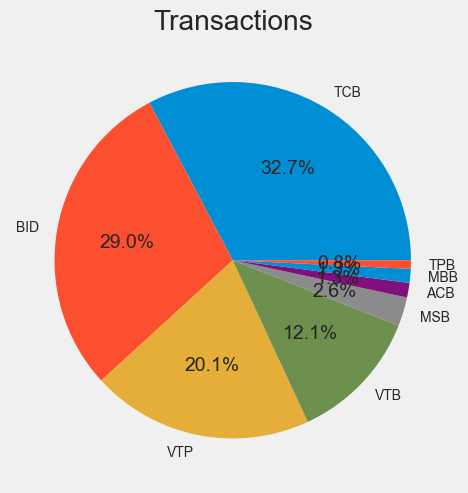

In [131]:
def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%'.format(pct, v=val)
        return my_format
plt.pie(proportion['Bank'],labels =proportion['index'],autopct=autopct_format(proportion['Bank']) )
plt.title('Transactions')
plt.show()

In [132]:
bank_sum = data.groupby('Bank')['Amount'].sum()
bank_sum = bank_sum.reset_index()
bank_sum=bank_sum.sort_values('Amount',ascending=False)
bank_sum.loc['Total'] = pd.Series(bank_sum['Amount'].sum(), index = ['Amount'])# add row total in the end

bank_sum.fillna('Total',inplace = True)
bank_sum['Amount'] = bank_sum['Amount'].map(lambda n: '{:,.0f}'.format(n))
bank_sum = bank_sum.reset_index()
bank_sum = bank_sum.drop(bank_sum.columns[0],axis=1)
# bank_sum

In [133]:
bank_sum_rate = data.copy()
bank_sum_rate['proportion'] = bank_sum_rate['Amount']*100 / bank_sum_rate['Amount'].sum()
bank_sum_rate = bank_sum_rate.groupby('Bank')['proportion'].sum()
bank_sum_rate = bank_sum_rate.reset_index()
bank_sum_rate = bank_sum_rate.sort_values('proportion',ascending=False)
bank_sum_rate.loc['Total'] = pd.Series(bank_sum_rate['proportion'].sum(), index = ['Amount'])# add row total in the end
bank_sum_rate['proportion'] = bank_sum_rate['proportion'].astype(float).map(lambda n: '{:.2f}%'.format(n))
# bank_sum_rate = bank_sum_rate.sort_values('	proportion',ascending=False)
bank_sum_rate.fillna('Total',inplace = True)
bank_sum_rate = bank_sum_rate.reset_index()
bank_sum_rate = bank_sum_rate.drop(bank_sum_rate.columns[0],axis=1)
# bank_sum_rate.info()

###DÒNG TIỀN COD NỘP VÀO CÁC TÀI KHOẢN NGÂN HÀNG

In [134]:
df_merged_amount = bank_sum_rate.merge(bank_sum, right_on='Bank',left_on='Bank')
df_merged_amount = df_merged_amount[['Bank','Amount','proportion']]
df_merged_amount['Amount']= df_merged_amount['Amount'].astype(str).apply(lambda x: x.replace(',','')) # bỏ ký tự ,
# data = data.dropna()
df_merged_amount['Amount'] = pd.to_numeric(df_merged_amount['Amount'])
# df_merged_amount.loc['Total'] = pd.Series(df_merged_amount['Amount'].sum(), index = ['Amount'])
df_merged_amount.fillna('Total',inplace = True)
df_merged_amount['Amount'] = df_merged_amount['Amount'].map(lambda n: '{:,.0f}'.format(n))
df_merged_amount['proportion']= df_merged_amount['proportion'].astype(str).apply(lambda x: x.replace('nan%','')) # bỏ ký tự ,


df_merged_amount

,Bank,Amount,proportion
0,TCB,"896,402,113,371",36.43%
1,VTB,"502,340,235,969",20.42%
2,VTP,"498,429,238,811",20.26%
3,BID,"196,027,519,279",7.97%
4,MSB,"148,123,955,113",6.02%
5,ACB,"93,600,996,963",3.80%
6,MBB,"82,313,525,589",3.35%
7,TPB,"43,167,604,191",1.75%
8,Total,"2,460,405,189,286",


### TỶ TRỌNG DÒNG TIỀN COD NỘP VÀO CÁC TÀI KHOẢN NGÂN HÀNG T1/2023

In [135]:
plot_bank_sum_rate= bank_sum_rate.copy()
plot_bank_sum_rate = plot_bank_sum_rate.iloc[:-1,:]
plot_bank_sum_rate['proportion'] = plot_bank_sum_rate['proportion'].astype(str).apply(lambda x: x.replace('%',''))
plot_bank_sum_rate['proportion'] = plot_bank_sum_rate['proportion'].astype(float)
# plot_bank_sum_rate

In [136]:
# plot_bank_sum_rate.info()

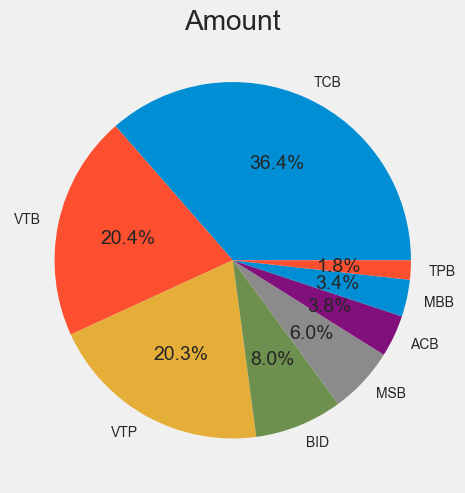

In [137]:
def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%'.format(pct, v=val)
        return my_format
plt.pie(plot_bank_sum_rate['proportion'],labels =plot_bank_sum_rate['Bank'],autopct=autopct_format(plot_bank_sum_rate['proportion']) )
plt.title('Amount')
plt.show()

### BIỂU ĐỒ THỂ HIỆN SỐ LƯỢNG GHI CÓ TRONG tháng 2/2023 VÀO CÁC TÀI KHOẢN NGÂN HÀNG THEO THỜI GIAN TRONG NGÀY 

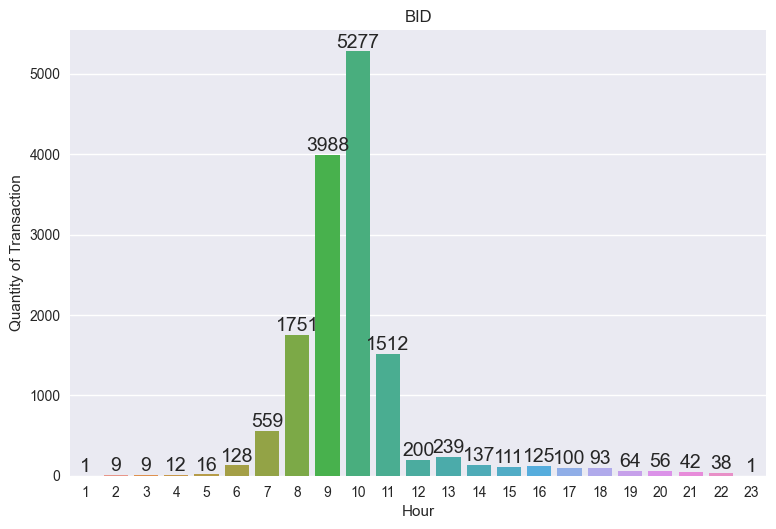

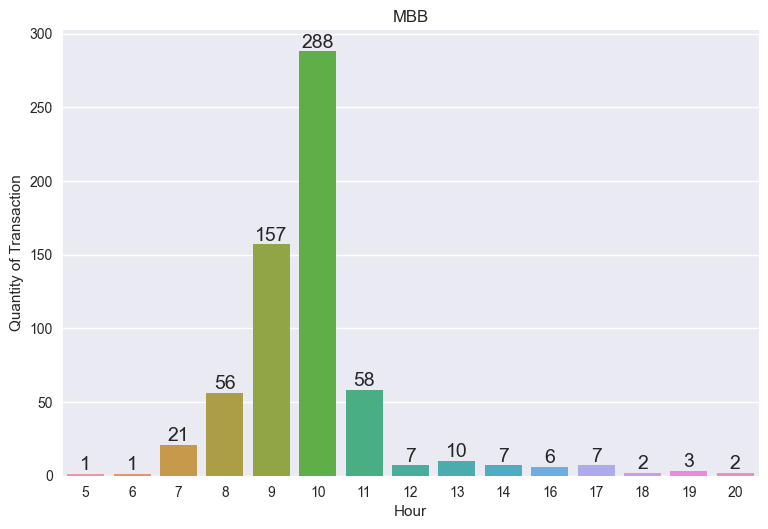

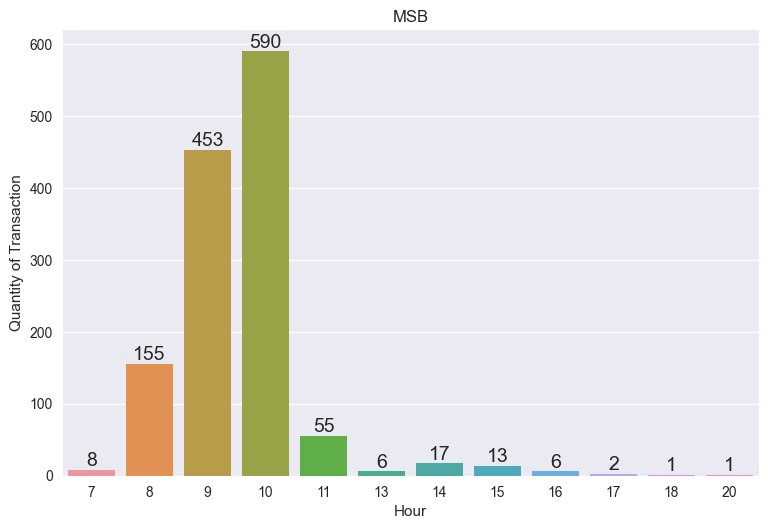

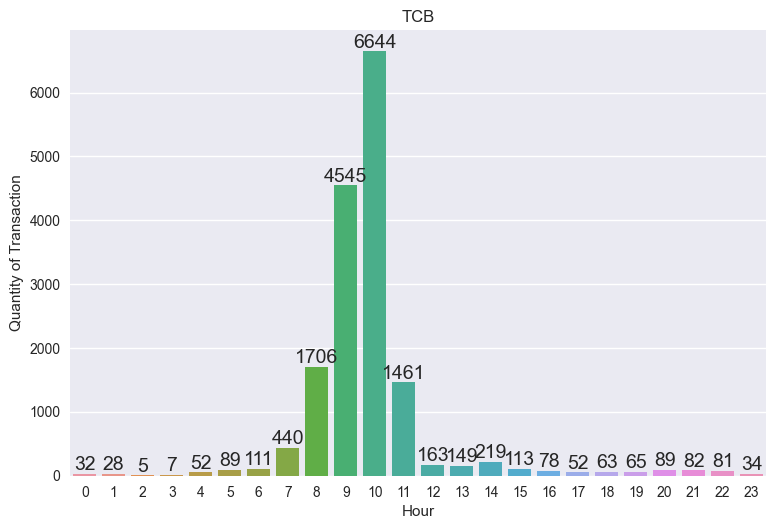

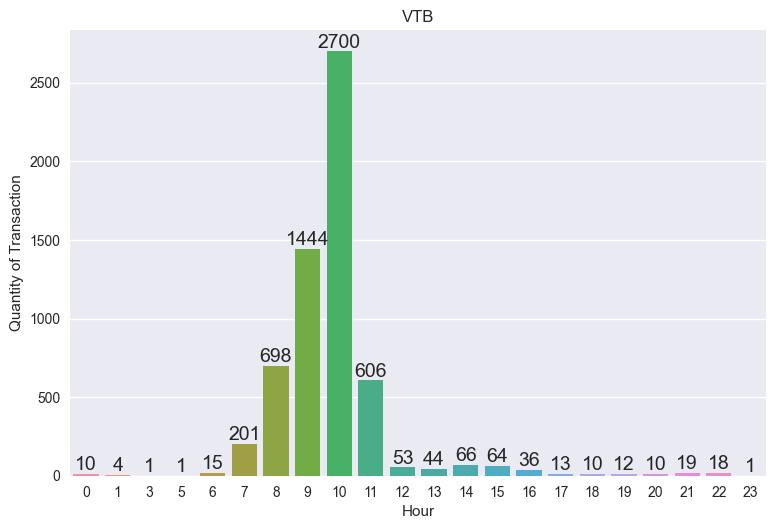

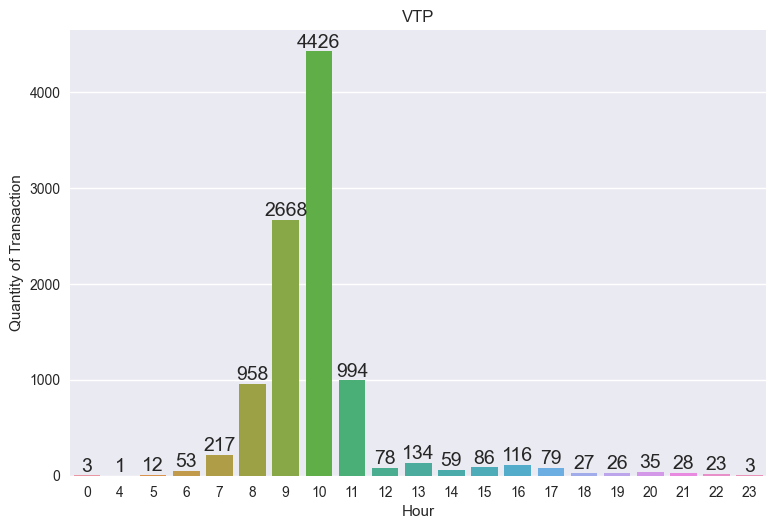

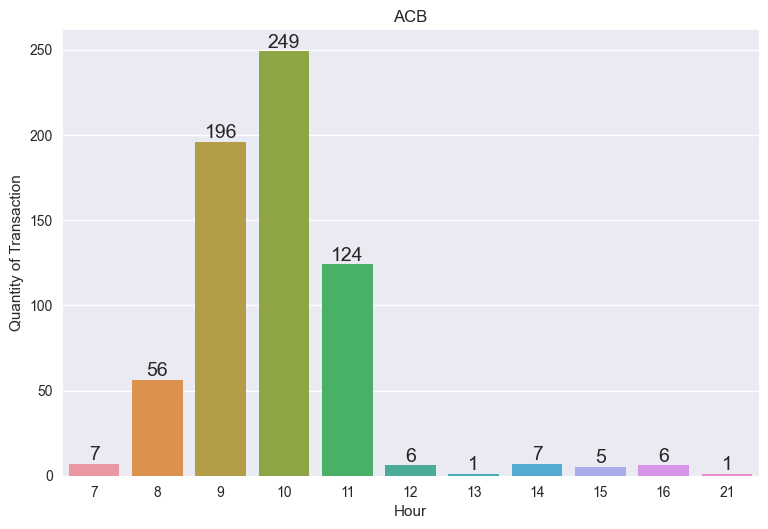

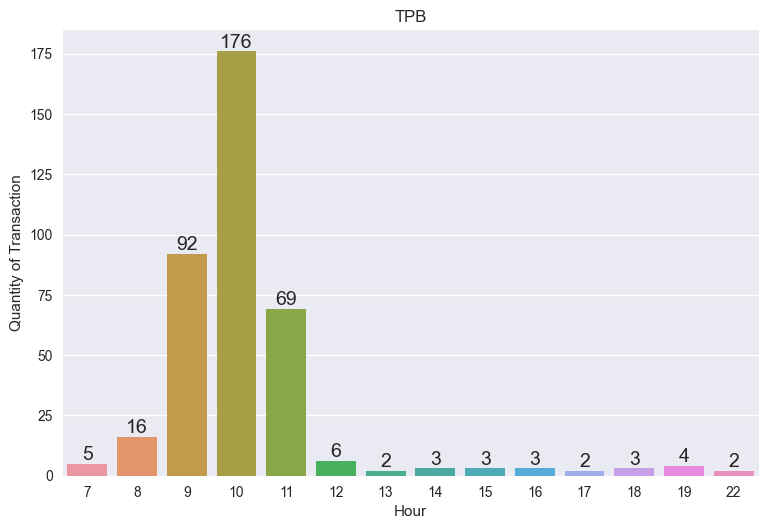

In [138]:
plt.style.use('seaborn')

for name in data['Bank'].unique():
    fig, ax = plt.subplots()
    sub = data[data.Bank == name] # loop filter data by Bank
    sub2 = sub.groupby('Datetime').count().reset_index() # groupby Bank , hour 
    sns.barplot(y='Amount',x='Datetime',data=sub2, ax=ax)
    ax.set_title(name.upper())
    plt.ylabel("Quantity of Transaction")
    plt.xlabel("Hour")
    # plt.title("Colors vs Values")
    for i in ax.containers:
        ax.bar_label(i,)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

### BIỂU ĐỒ THỂ HIỆN DÒNG TIỀN COD GHI CÓ TRONG tháng 2/2023 VÀO CÁC TÀI KHOẢN NGÂN HÀNG THEO THỜI GIAN TRONG NGÀY 

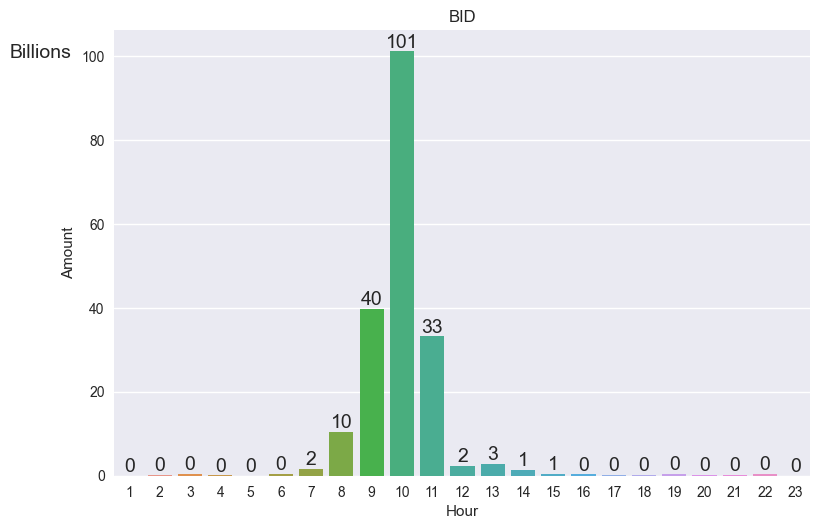

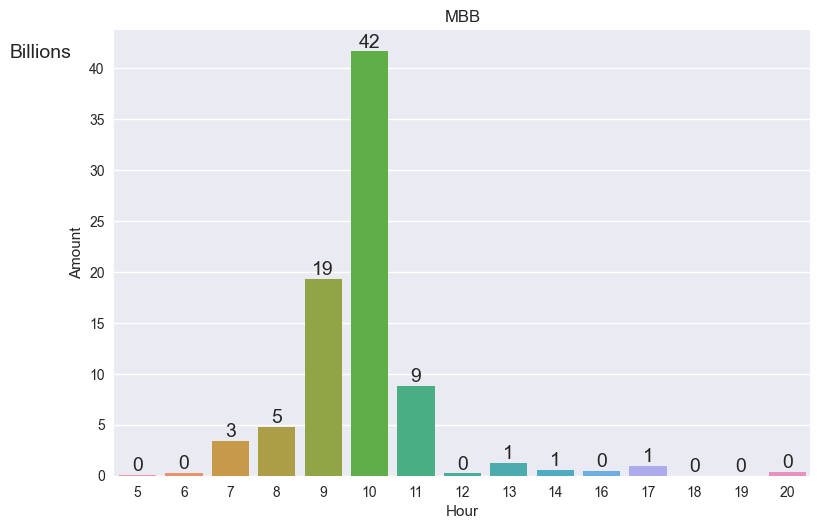

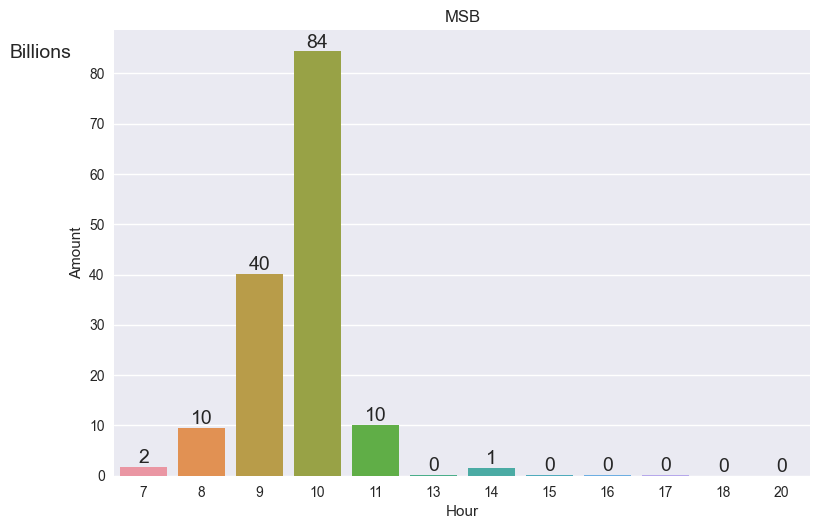

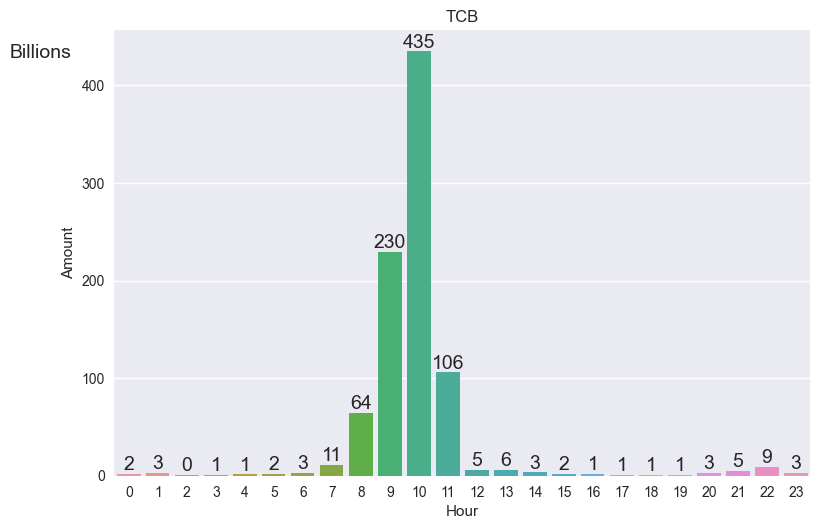

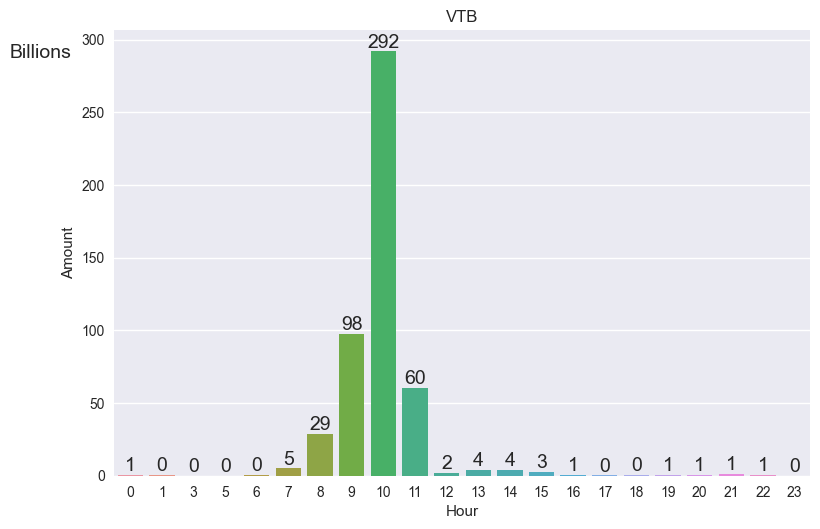

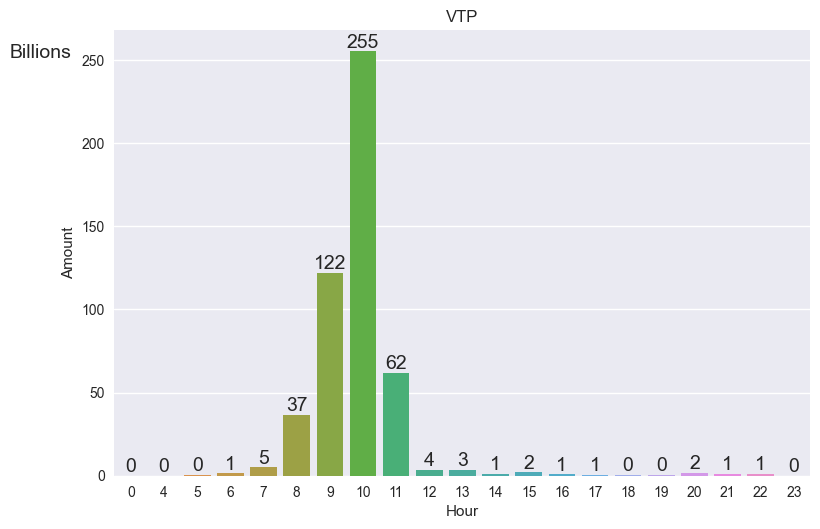

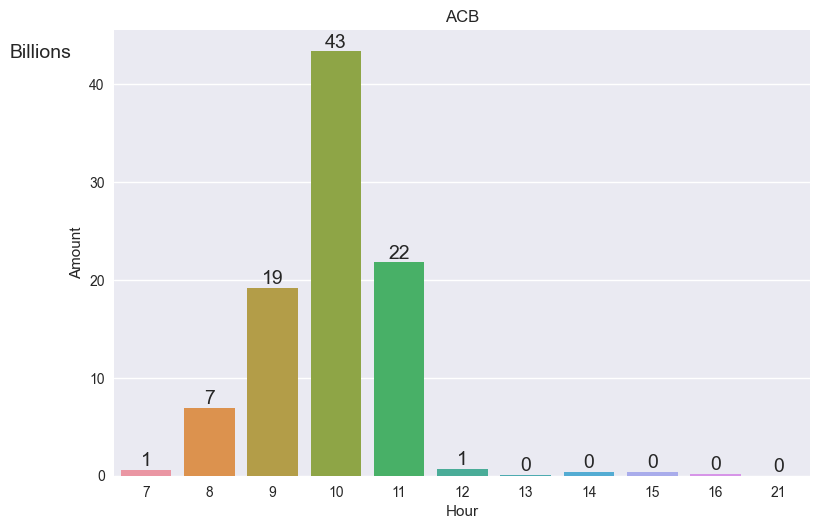

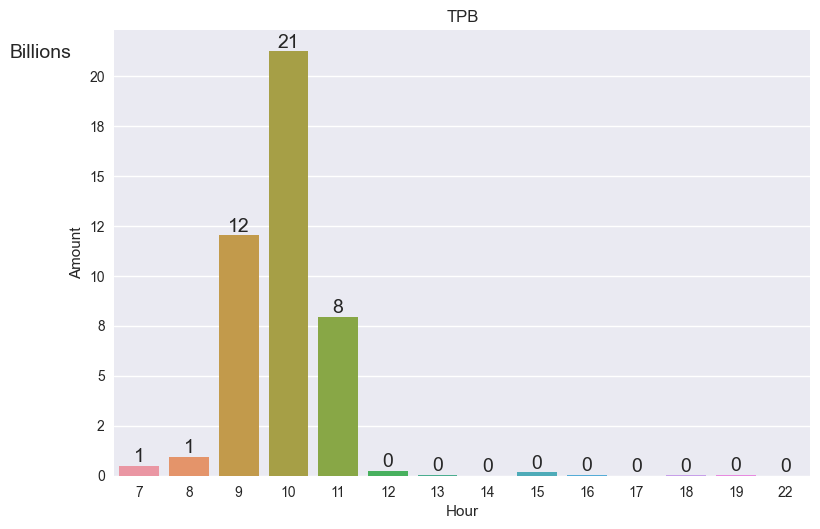

In [139]:
plt.style.use('seaborn')

for name in data['Bank'].unique():
    fig, ax = plt.subplots()
    sub = data[data.Bank == name] # loop filter data by Bank
    sub2 = sub.groupby('Datetime')['Amount'].sum().reset_index() # groupby Bank , hour 
    # sub2 = sub2.reset_index()
    sns.barplot(y='Amount',x='Datetime',data=sub2, ax=ax)
    ax.set_title(name.upper())
    ax.text(-0.15, 0.97, "Billions", transform = ax.transAxes, ha = "left", va = "top")
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.0f}'.format(y/1000000000)))
    plt.ylabel("Amount")
    plt.xlabel("Hour")
    # plt.title("Colors vs Values")
    for i in ax.containers:
        ax.bar_label(i,labels=['{:,.0f}'.format(x/1000000000) for x in i.datavalues])
warnings.simplefilter(action='ignore', category=DeprecationWarning)

In [140]:
### BIỂU ĐỒ THỂ HIỆN MẬT ĐỘ SỐ LƯỢNG GHI CÓ THEO GIÁ TRỊ TRONG tháng 2/2023 VÀO CÁC TÀI KHOẢN NGÂN HÀNG THEO THỜI GIAN TRONG NGÀY 

### BIỂU ĐỒ THỂ HIỆN MẬT ĐỘ SỐ LƯỢNG GHI CÓ THEO GIÁ TRỊ TRONG tháng 2/2023 VÀO CÁC TÀI KHOẢN NGÂN HÀNG THEO THỜI GIAN TRONG NGÀY 

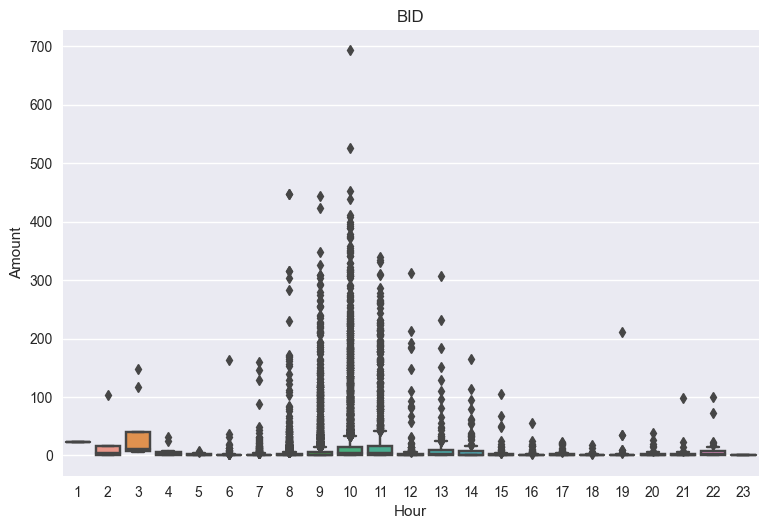

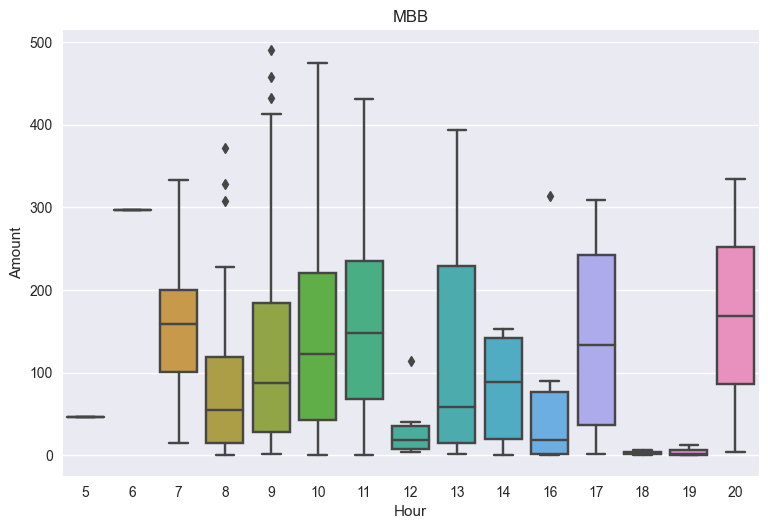

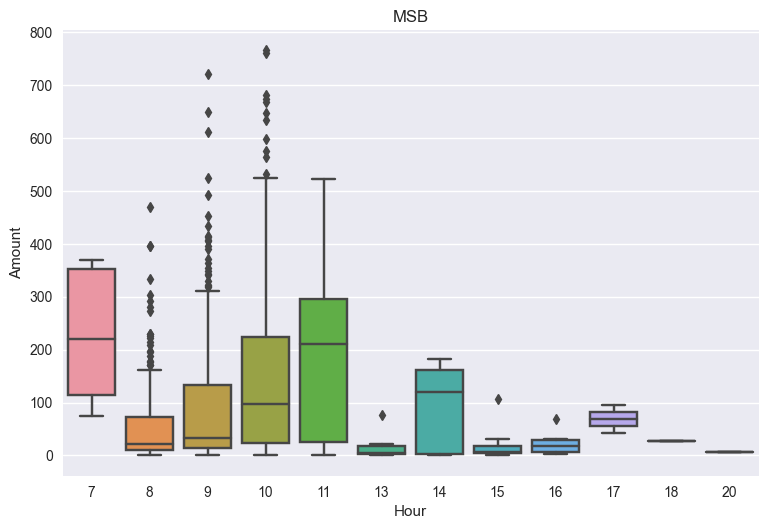

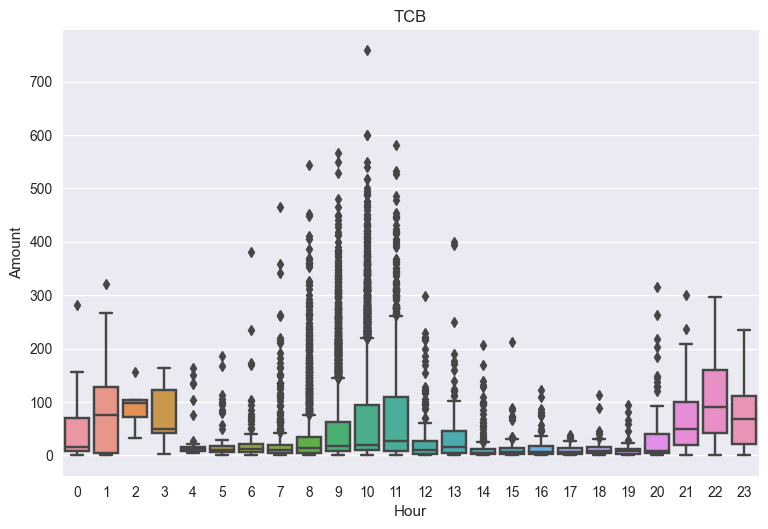

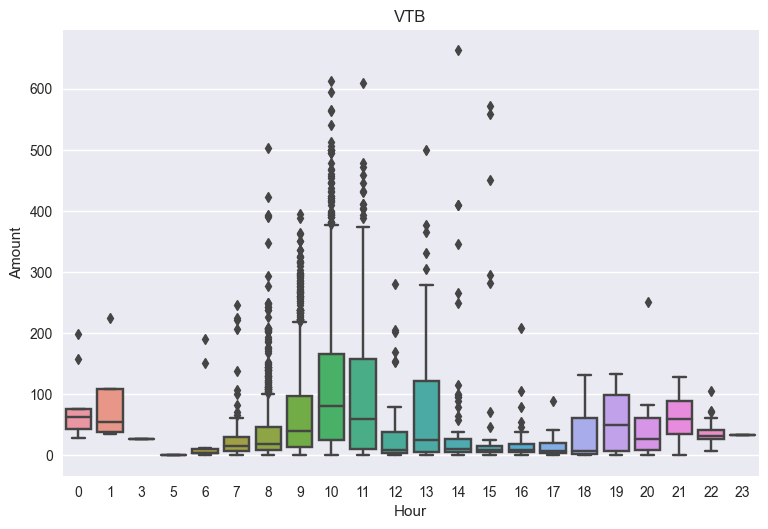

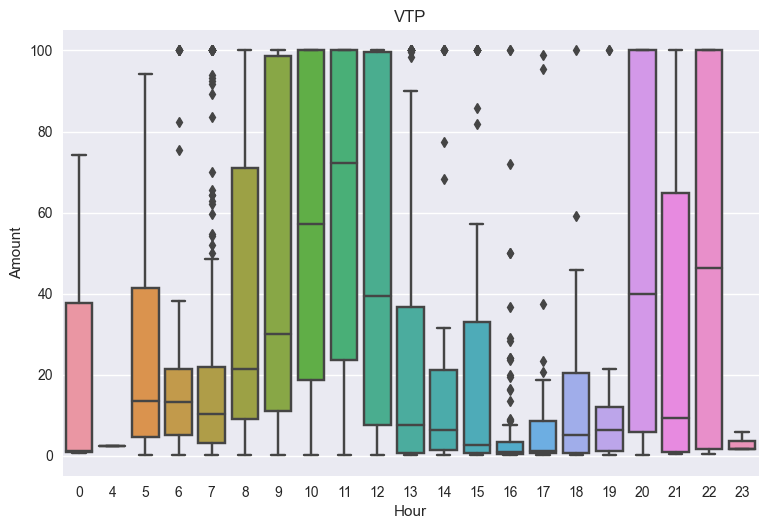

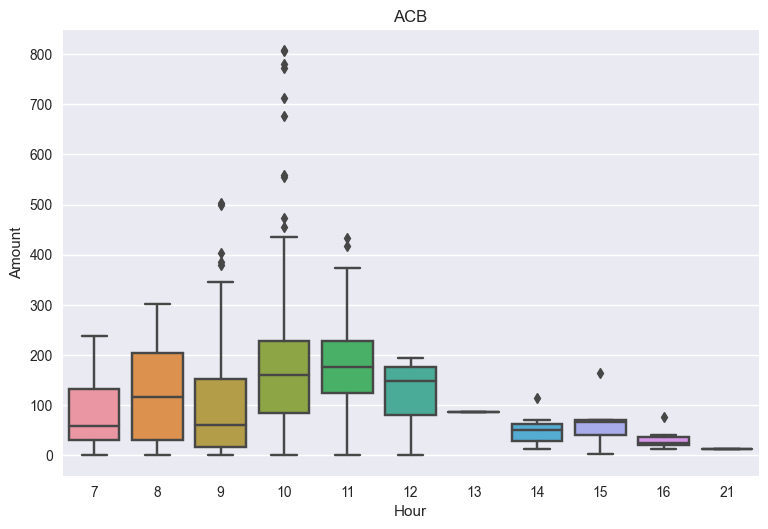

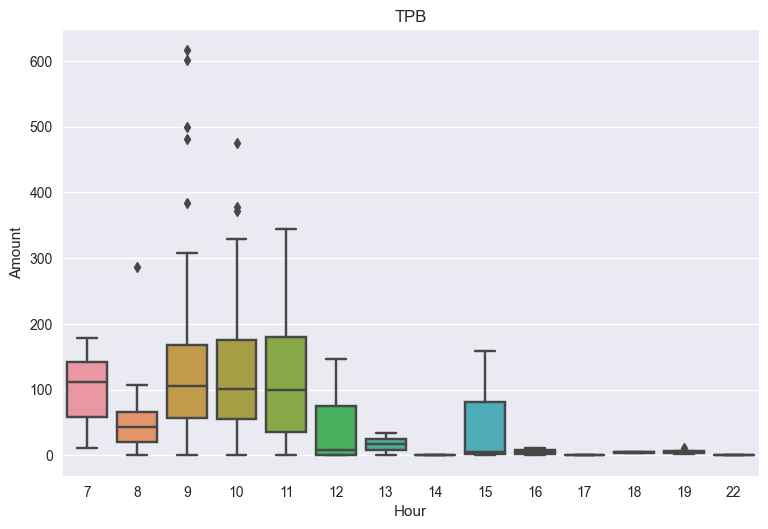

In [141]:
plt.style.use('seaborn')

for name in data['Bank'].unique():
    fig, ax = plt.subplots()
    sub = data[data.Bank == name] # loop filter data by Bank
    sub2 = sub.groupby('Datetime').count().reset_index() # groupby Bank , hour 
    sns.boxplot(y='Amount',x='Datetime',data=sub, ax=ax)
    ax.set_title(name.upper())
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.0f}'.format(y/1000000)))
    plt.ylabel("Amount")
    plt.xlabel("Hour")
    # plt.title("Colors vs Values")
    # for i in ax.containers:
    #     ax.bar_label(i,)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

In [142]:
# data

In [143]:
# data.to_excel('data.xlsx')

In [144]:
#convert to dayname
import datetime
data['Date'] =  pd.to_datetime(data['Date'].astype(str),format='%d/%m/%Y')
# data['Date'] =  pd.to_datetime(data.Date, format ='%d-%m-%Y')
data['Dayname']= data['Date'].dt.dayofweek
days = {0:'Mon',1:'Tues',2:'Weds',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'}
# data['Date'] =  pd.to_datetime(data.Date, format ='%d/%m/%Y')
data['Dayname'] = data['Dayname'].apply(lambda x: days[x])
# data.to_excel('data.xlsx')

In [145]:
# data.info()

In [146]:
days = ["Mon", "Tues", "Weds", "Thurs", "Fri", "Sat", "Sun"]

#Using Categorical() function to set the order according to how it is arranged above
data["Dayname"] = pd.Categorical(data.Dayname, categories=days, ordered=True)
# data


### BIỂU ĐỒ THỂ HIỆN SỐ LƯỢNG GHI CÓ THEO CÁC NGÀY TRONG TUÂN CỦA tháng 2/2023 VÀO CÁC TÀI KHOẢN NGÂN HÀNG

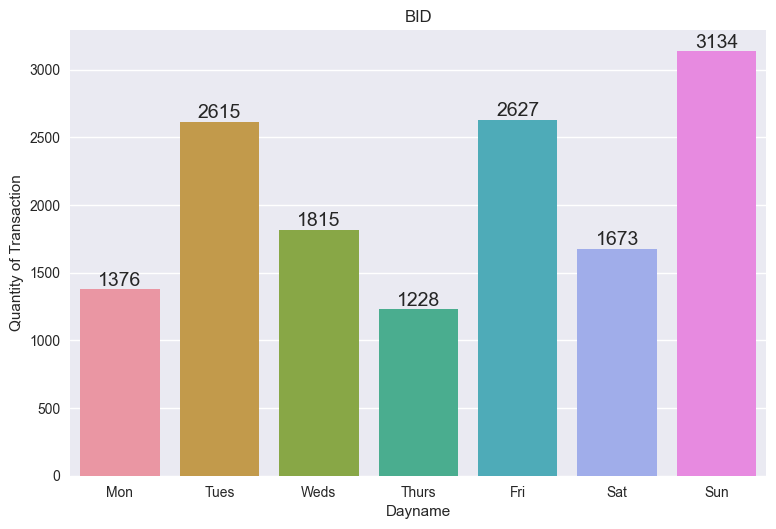

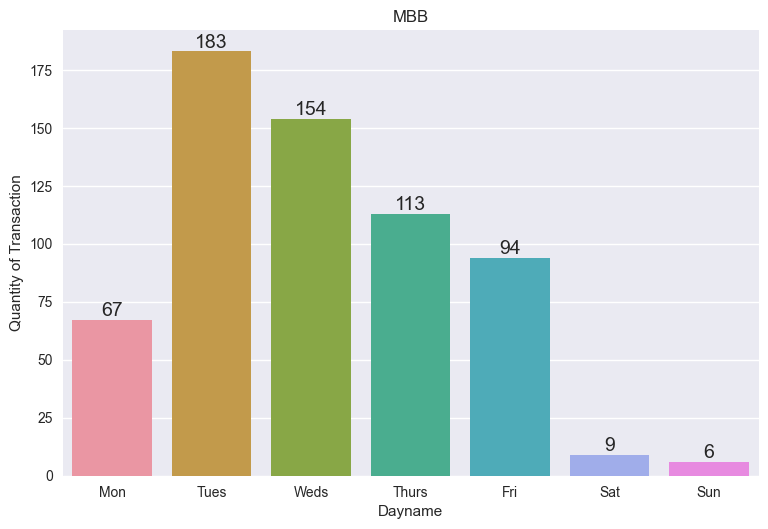

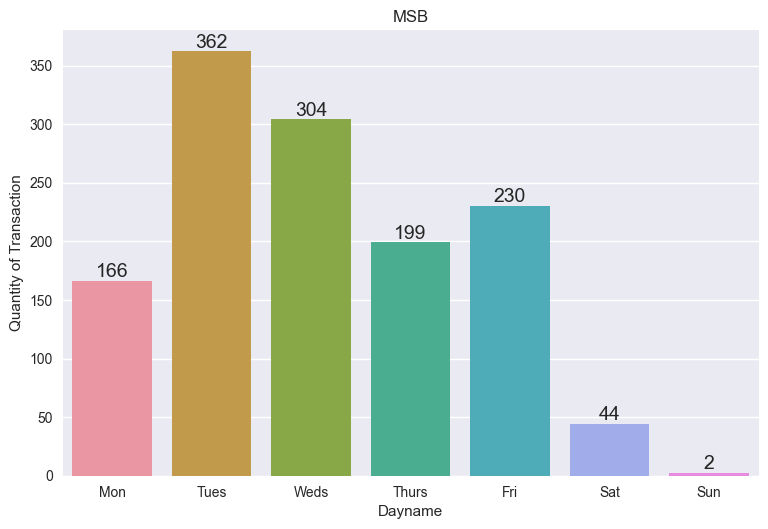

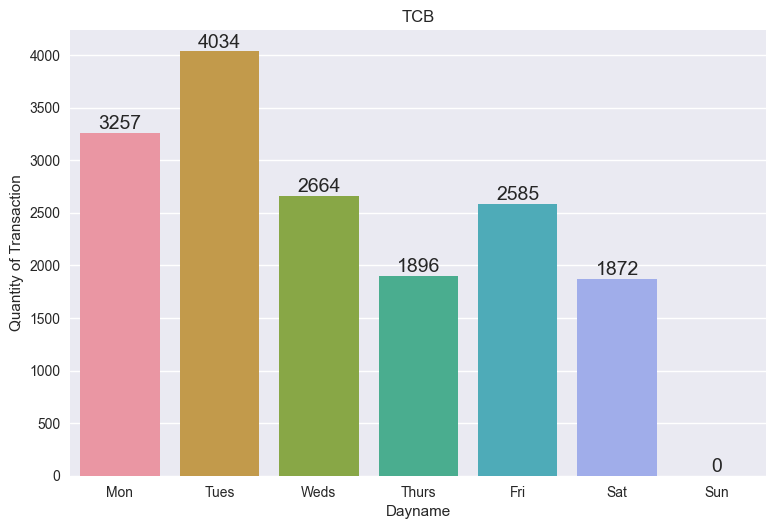

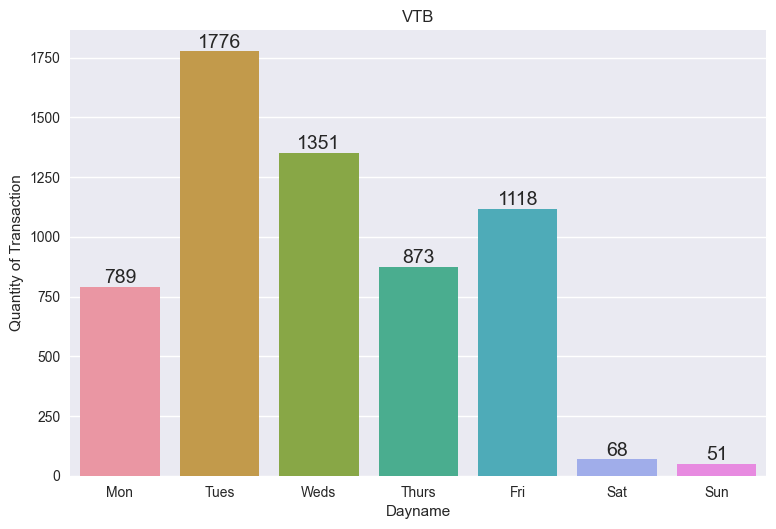

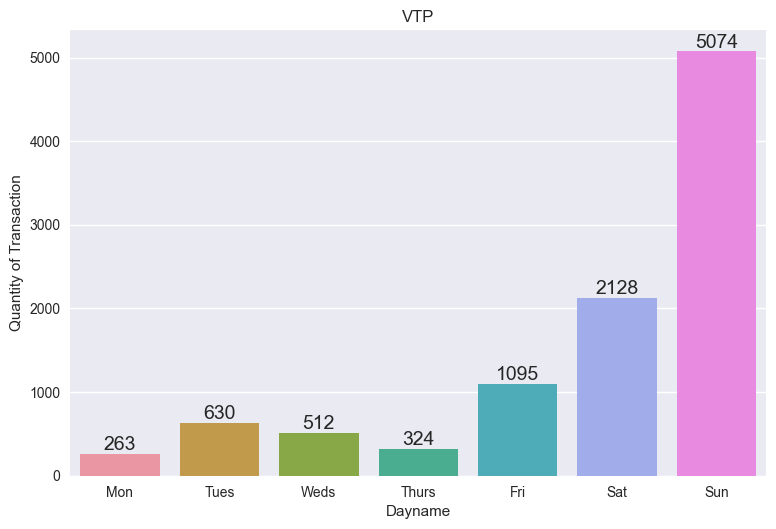

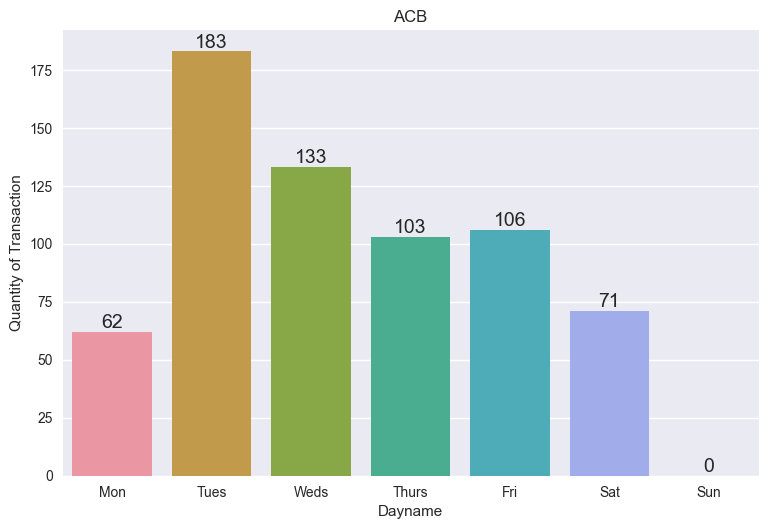

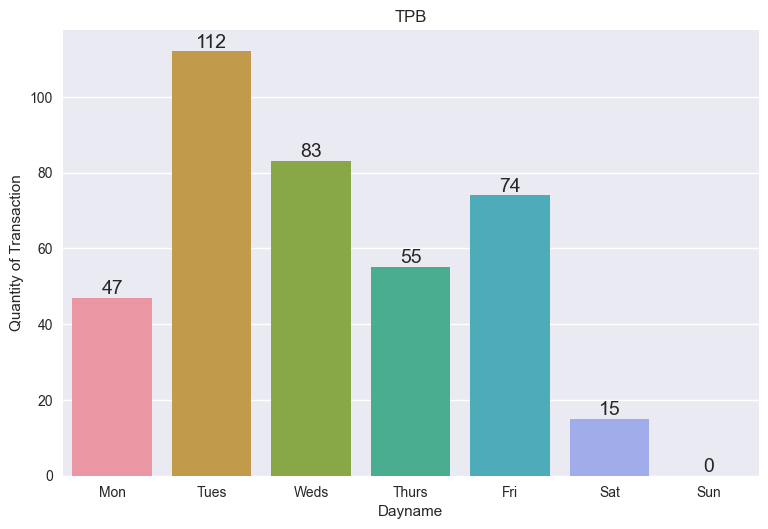

In [147]:
plt.style.use('seaborn')

for name in data['Bank'].unique():
    fig, ax = plt.subplots()
    sub = data[data.Bank == name]
    sub = sub.sort_values('Dayname') # loop filter data by Bank
    sub2 = sub.groupby('Dayname').count().reset_index() # groupby Bank , hour 
    sns.barplot(y='Amount',x='Dayname',data=sub2, ax=ax)
    ax.set_title(name.upper())
    # ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.0f}'.format(y/1000000)))
    plt.ylabel("Quantity of Transaction")
    plt.xlabel("Dayname")
    # plt.title("Colors vs Values")
    # for i in ax.containers:
    #     ax.bar_label(i,)
    for i in ax.containers:
        ax.bar_label(i,)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

### BIỂU ĐỒ THỂ HIỆN DÒNG TIỀN GHI CÓ THEO CÁC NGÀY TRONG TUÂN CỦA tháng 2/2023 VÀO CÁC TÀI KHOẢN NGÂN HÀNG

In [148]:
# sub

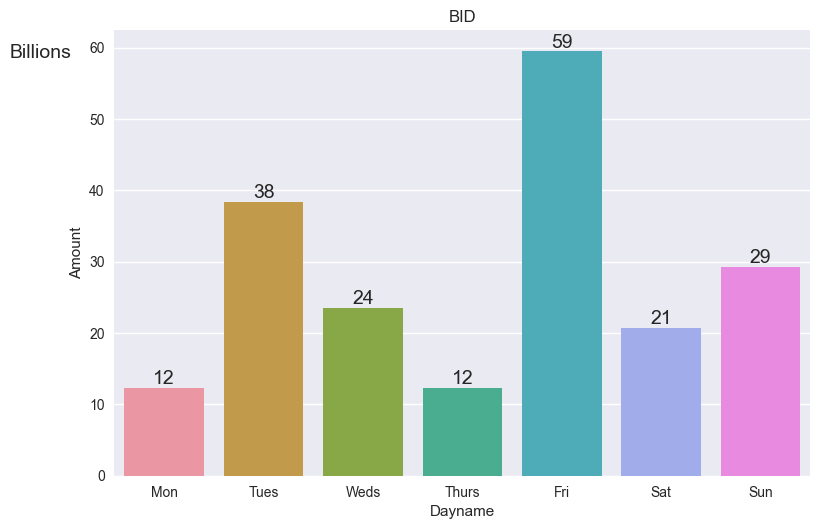

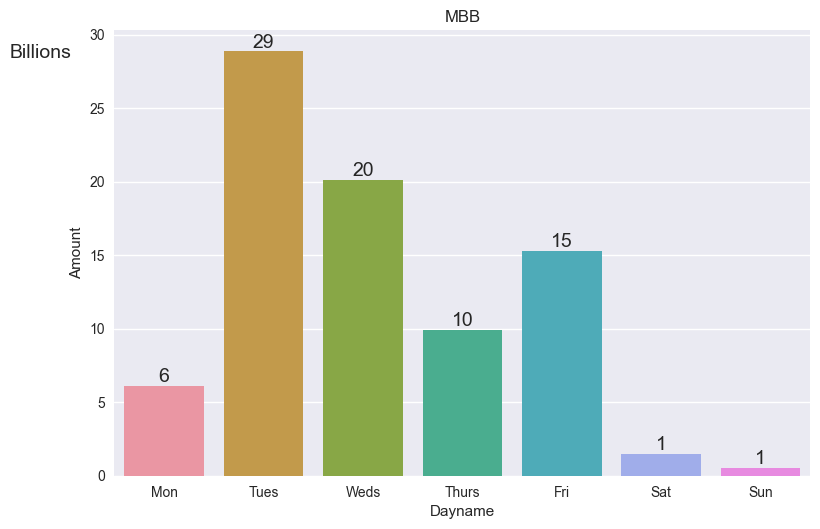

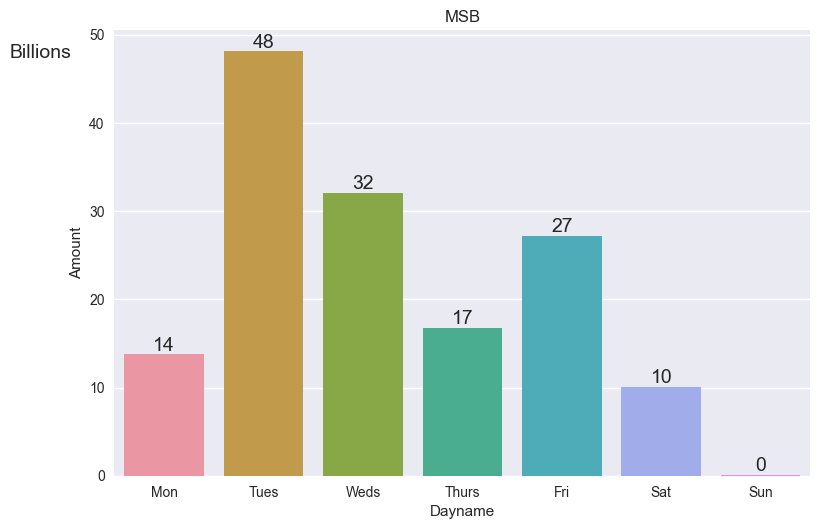

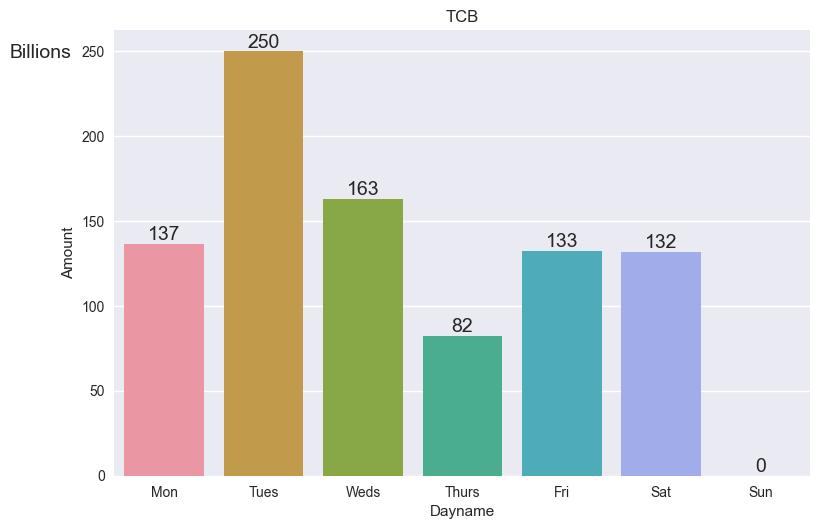

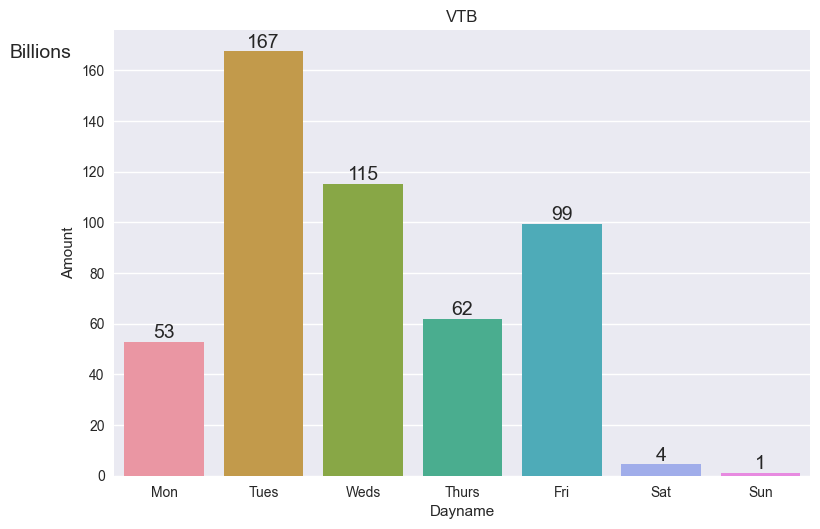

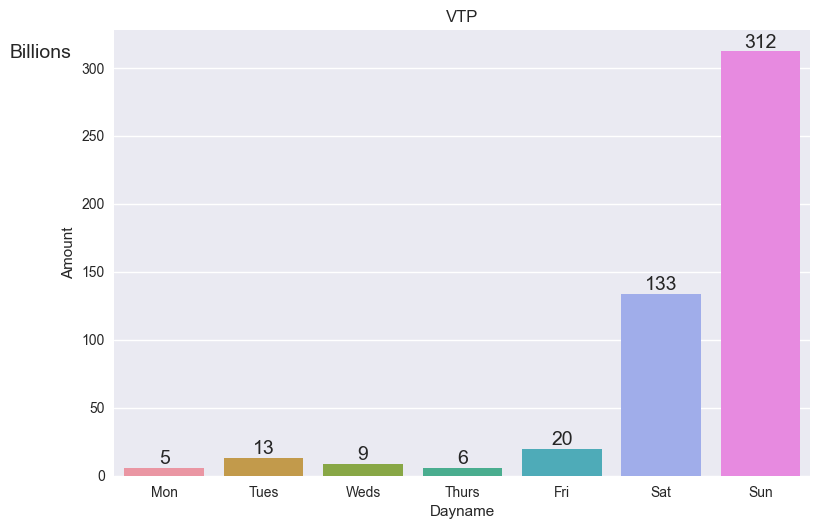

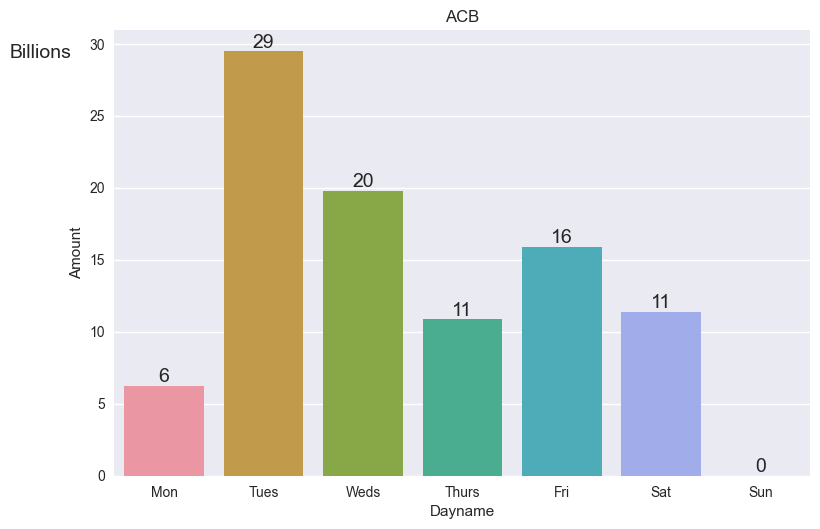

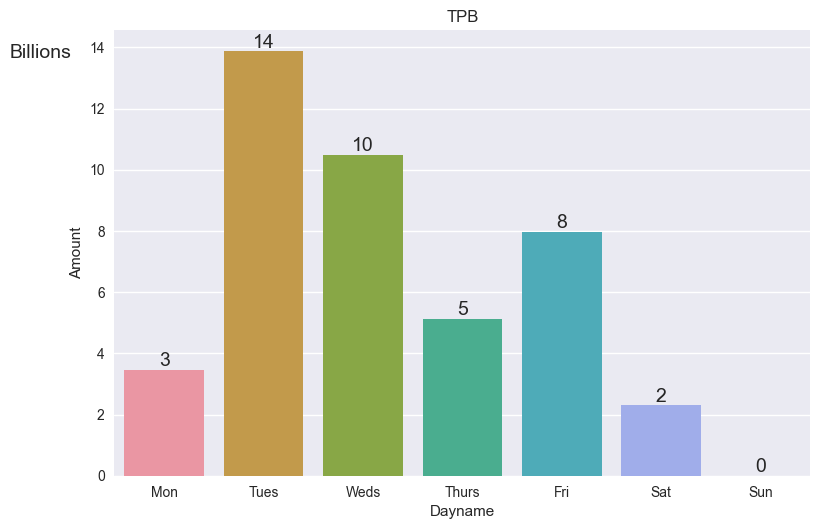

In [149]:
plt.style.use('seaborn')

for name in data['Bank'].unique():
    fig, ax = plt.subplots()
    sub = data[data.Bank == name]
    sub = sub.sort_values('Dayname') # loop filter data by Bank
    sub2 = sub.groupby('Dayname')['Amount'].sum().reset_index() # groupby Bank , hour 
    sub2 = sub2.sort_values('Dayname')
    sns.barplot(y='Amount',x='Dayname',data=sub2, ax=ax)
    ax.set_title(name.upper())
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.0f}'.format(y/1000000000)))
    ax.text(-0.15, 0.97, "Billions", transform = ax.transAxes, ha = "left", va = "top")
    plt.ylabel("Amount")
    plt.xlabel("Dayname")
    # plt.title("Colors vs Values")
    # for i in ax.containers:
    #     ax.bar_label(i,)
    for i in ax.containers:
        ax.bar_label(i,labels=['{:,.0f}'.format(x/1000000000) for x in i.datavalues])
warnings.simplefilter(action='ignore', category=DeprecationWarning)

In [150]:
def get_loc_id_kho(x):
    import re
    tokens = [number for number in re.findall("\d+", str(x)) if len(number) == 4 or len(number) == 8]
    if len(tokens) >=1:
        return tokens
    else:
        return None
def get_loc_id_nv(x):
    import re
    tokens = [number for number in re.findall("\d+", str(x)) if len(number) == 6 or len(number) == 7]
    if len(tokens) >=1:
        return tokens
    else:
        return None

In [151]:
data_map_id_kho = data.copy() # data lấy được mã kho
# data_map_id_nv = data.copy()
data_map_id_kho['Des'] = data_map_id_kho["Des"].str.replace('00 0','000')
data_map_id_kho['id_kho'] = data_map_id_kho['Des'].apply(get_loc_id_kho)

# data_map_id.head()

In [152]:
data_map_id_kho_null = data_map_id_kho[data_map_id_kho['id_kho'].isnull()] #data không lấy được mã kho
data_map_id_kho = data_map_id_kho.explode('id_kho')

In [153]:
data_map_id_kho.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88248 entries, 12 to 114
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      88248 non-null  datetime64[ns]
 1   Datetime  88248 non-null  int64         
 2   Des       88248 non-null  object        
 3   Amount    88248 non-null  int64         
 4   Bank      88248 non-null  object        
 5   Dayname   88248 non-null  category      
 6   id_kho    77965 non-null  object        
dtypes: category(1), datetime64[ns](1), int64(2), object(3)
memory usage: 4.8+ MB


In [154]:
data_map_id_nv = data_map_id_kho_null.copy()
data_map_id_nv['id_nv'] = data_map_id_nv['Des'].apply(get_loc_id_nv) #data lấy đc mã nhân viên

In [155]:
# data_map_id_nv.info()

In [156]:
data_null = data_map_id_nv[data_map_id_nv['id_nv'].isnull()] # data còn lại không lấy được
data_null.to_excel('data_null.xlsx', index = False)

In [157]:
# final=pd.concat([data_map_id_kho, data_map_id_nv], axis=1)

In [158]:

data_map_id_nv = data_map_id_nv.explode('id_nv')

In [159]:
# data_map_id_kho.to_excel('id_kho.xlsx')

In [160]:
data_map_id_nv

,Date,Datetime,Des,Amount,Bank,Dayname,id_kho,id_nv
183,2023-01-01,9,"REM TKTHE :7717205201552, TAI AGRIBANK. BIDV;1...",622500,BID,Sun,None,None
56,2023-01-03,16,HUB2091900NV1765027GHN,45498802,TCB,Tues,None,2091900
56,2023-01-03,16,HUB2091900NV1765027GHN,45498802,TCB,Tues,None,1765027
94,2023-01-03,11,NGUYEN HUY HIEU CHUYEN KHOAN,130000,TCB,Tues,None,None
108,2023-01-03,11,TCB 19030347226091 DOAN DUY THANH C HUYEN KHOAN,7420000,TCB,Tues,None,None
...,...,...,...,...,...,...,...,...
110,2023-01-31,7,800039 GHN1 230131710249626 VIETTELPAY,10822000,VTP,Tues,None,800039
111,2023-01-31,7,800039 GHN1 230131710237698 VIETTELPAY,5149000,VTP,Tues,None,800039
112,2023-01-31,7,800039 GHN1 230131709930972 VIETTELPAY,11511000,VTP,Tues,None,800039
113,2023-01-31,7,800039 GHN1 230131709901632 VIETTELPAY,5533000,VTP,Tues,None,800039


In [161]:
def get_loc_id_kho_v3ghn8(x):
    import re
    tokens = [number for number in re.findall("V3GHN\d{8}", str(x)) ]
    # tokens = [number for number in re.findall("(HUB\d{4})|(HUB\s\d{4})|(HUB\d{8})|(HUB\s\d{8})|(V3GHN\d{8})|(V3GHN\d{4})|([_]\d{4}[_]BUU)|([_]\d{8}[_]BUU)", str(x)) ]
    if len(tokens) ==0:
            return None
    else: 
        return tokens[0]

def get_loc_id_kho_v3ghn4(x):
    import re
    tokens = [number for number in re.findall("V3GHN\d{4}", str(x)) ]
    # tokens = [number for number in re.findall("(HUB\d{4})|(HUB\s\d{4})|(HUB\d{8})|(HUB\s\d{8})|(V3GHN\d{8})|(V3GHN\d{4})|([_]\d{4}[_]BUU)|([_]\d{8}[_]BUU)", str(x)) ]
    if len(tokens) ==0:
            return None
    else: 
        return tokens[0]
def get_loc_id_kho_hub8(x):
    import re
    tokens = [number for number in re.findall("HUB\d{8}", str(x)) ]
    # tokens = [number for number in re.findall("(HUB\d{4})|(HUB\s\d{4})|(HUB\d{8})|(HUB\s\d{8})|(V3GHN\d{8})|(V3GHN\d{4})|([_]\d{4}[_]BUU)|([_]\d{8}[_]BUU)", str(x)) ]
    if len(tokens) ==0:
            return None
    else: 
        return tokens[0]
def get_loc_id_kho_hub4(x):
    import re
    tokens = [number for number in re.findall("HUB\d{4}", str(x)) ]
    # tokens = [number for number in re.findall("(HUB\d{4})|(HUB\s\d{4})|(HUB\d{8})|(HUB\s\d{8})|(V3GHN\d{8})|(V3GHN\d{4})|([_]\d{4}[_]BUU)|([_]\d{8}[_]BUU)", str(x)) ]
    if len(tokens) ==0:
            return None
    else: 
        return tokens[0]
def get_loc_id_kho_buucuc8(x):
    import re
    tokens = [number for number in re.findall("\d{8}[_]BUU", str(x)) ]
    # tokens = [number for number in re.findall("(HUB\d{4})|(HUB\s\d{4})|(HUB\d{8})|(HUB\s\d{8})|(V3GHN\d{8})|(V3GHN\d{4})|([_]\d{4}[_]BUU)|([_]\d{8}[_]BUU)", str(x)) ]
    if len(tokens) ==0:
            return None
    else: 
        return tokens[0]
def get_loc_id_kho_buucuc4(x):
    import re
    tokens = [number for number in re.findall("\d{4}[_]BUU", str(x)) ]
    # tokens = [number for number in re.findall("(HUB\d{4})|(HUB\s\d{4})|(HUB\d{8})|(HUB\s\d{8})|(V3GHN\d{8})|(V3GHN\d{4})|([_]\d{4}[_]BUU)|([_]\d{8}[_]BUU)", str(x)) ]
    if len(tokens) ==0:
            return None
    else: 
        return tokens[0]
def get_loc_id_kho_8(x):
    import re
    tokens = [number for number in re.findall("\d+", str(x)) if len(number) == 8 ] #or len(number) == 6 or len(number) == 7
    if len(tokens) == 0:
        return None
    else:
        return tokens[0]

def get_loc_id_kho_4(x):
    import re
    import re
    tokens = [number for number in re.findall("\d+", str(x)) if len(number) == 4 ] #or len(number) == 6 or len(number) == 7
    if len(tokens) == 0:
        return None
    else:
        return tokens[0]


In [162]:
v3ghn8 = data.copy()
kho_id = pd.read_excel('LIST_KHO.xlsx')
#59201

In [163]:
v3ghn8['Des'] = v3ghn8['Des'].str.upper()
# v3ghn8['Des']= v3ghn8['Des'].str.replace(['HUB ','HUD ','HBU','HBU ','HUH ','HB'], ['HUB'])
v3ghn8['Des']= v3ghn8['Des'].str.replace('HUB ','HUB')
v3ghn8['Des']= v3ghn8['Des'].str.replace('HUB   ','HUB')
v3ghn8['Des']= v3ghn8['Des'].str.replace('HUB:','HUB')
v3ghn8['Des']= v3ghn8['Des'].str.replace('HU ','HUB')
v3ghn8['Des']= v3ghn8['Des'].str.replace('BC ','HUB')
v3ghn8['Des']= v3ghn8['Des'].str.replace('BC','HUB')
v3ghn8['Des']= v3ghn8['Des'].str.replace('HIB','HUB')
v3ghn8['Des']= v3ghn8['Des'].str.replace('HUB  ','HUB')
v3ghn8['Des']= v3ghn8['Des'].str.replace('HUD ','HUB')
v3ghn8['Des']= v3ghn8['Des'].str.replace('HBU','HUB')
v3ghn8['Des']= v3ghn8['Des'].str.replace('HBU ','HUB')
v3ghn8['Des']= v3ghn8['Des'].str.replace('HUH ','HUB')
v3ghn8['Des']= v3ghn8['Des'].str.replace('HB','HUB')
v3ghn8['Des']= v3ghn8['Des'].str.replace('HUP','HUB')
v3ghn8['Des']= v3ghn8['Des'].str.replace('HHB','HUB')
v3ghn8['Des']= v3ghn8['Des'].str.replace('HVB','HUB')
v3ghn8['Des']= v3ghn8['Des'].str.replace('HUD','HUB')
v3ghn8['Des']= v3ghn8['Des'].str.replace('VH3GHN ','V3GHN')
v3ghn8['Des']= v3ghn8['Des'].str.replace('V3GHN ','V3GHN')
v3ghn8['Des']= v3ghn8['Des'].str.replace('HUN ','HUB')
v3ghn8['Des']= v3ghn8['Des'].str.replace('HUN','HUB')
v3ghn8 = v3ghn8[v3ghn8["Des"].str.contains('CHUYEN TRA|(B/O CONG TY CO PHAN DICH VU GIAO HANG NHANH)|VDS CHUYEN TIEN THANH TOAN CHO CTCP DICH VU GIAOHANG NHANH|CTY CHO COD MUON|CHUYEN TU|GHN CHUYEN TIEN NOI BO|HOAN TRA|HTRA|SAI TK|SAI TEN|TRA LAI')==False]
# id2['Des'] = id2["Des"].str.replace('00 0','000')
v3ghn8['id'] = v3ghn8['Des'].apply(get_loc_id_kho_v3ghn8)
m2 = v3ghn8['id'].isna()
data_t1 = v3ghn8[~m2]
# v3ghn8.info()
# data_t1.info()

In [164]:
# v3ghn4 = v3ghn8[m2].info()
v3ghn4 = v3ghn8[m2]
v3ghn4['id'] = v3ghn4['Des'].apply(get_loc_id_kho_v3ghn4)
m3 = v3ghn4['id'].isna()
data_t2 = v3ghn4[~m3]
# data_t2.info()

C:\Users\Admin\AppData\Local\Temp\ipykernel_5220\2778555732.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v3ghn4['id'] = v3ghn4['Des'].apply(get_loc_id_kho_v3ghn4)


In [165]:
hub8 = v3ghn4[m3]
# hub8['Des']= hub8['Des'].str.replace('HUB ','HUB')
# hub8['Des']= hub8['Des'].str.replace('HU','HUB')
# hub8['Des']= hub8['Des'].str.replace('HUBB ','HUB')
# hub8['Des']= hub8['Des'].str.replace('UB ','HUB')
# hub8['Des']= hub8['Des'].str.replace('UB','HUB')
# hub8['Des']= hub8['Des'].str.replace('_','')
# hub8.info()
hub8['id'] = hub8['Des'].apply(get_loc_id_kho_hub8)
m4 = hub8['id'].isna()
data_t3 = hub8[~m4]
# data_t3.info()
# hub8.to_excel('t.xlsx')

C:\Users\Admin\AppData\Local\Temp\ipykernel_5220\1499330198.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hub8['id'] = hub8['Des'].apply(get_loc_id_kho_hub8)


In [166]:
hub4 = hub8[m4]
# hub4.info()
# hub4['Des']= hub4['Des'].str.replace('HU ','HUB')
# hub4['Des']= hub4['Des'].str.replace('UB ','HUB')
# hub4['Des']= hub4['Des'].str.replace('UB','HUB')
hub4['id'] = hub4['Des'].apply(get_loc_id_kho_hub4)
m5 = hub4['id'].isna()
data_t4 = hub4[~m5]
# data_t4.info()

C:\Users\Admin\AppData\Local\Temp\ipykernel_5220\1718485227.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hub4['id'] = hub4['Des'].apply(get_loc_id_kho_hub4)


In [167]:
buu8 = hub4[m5]
# buu8.info()
buu8['id'] = buu8['Des'].apply(get_loc_id_kho_buucuc8)
m6 = buu8['id'].isna()
data_t5 = buu8[~m6]
# data_t5.info()

C:\Users\Admin\AppData\Local\Temp\ipykernel_5220\2986255726.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  buu8['id'] = buu8['Des'].apply(get_loc_id_kho_buucuc8)


In [168]:
buu4 = buu8[m6]
# buu8['Des']= buu8['Des'].str.replace('HUB ','HUB')
# buu4.info()
buu4['id'] = buu4['Des'].apply(get_loc_id_kho_buucuc4)
m7 = buu4['id'].isna()
data_t6 = buu4[~m7]
# data_t6.info()

C:\Users\Admin\AppData\Local\Temp\ipykernel_5220\1994867855.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  buu4['id'] = buu4['Des'].apply(get_loc_id_kho_buucuc4)


In [169]:
remain1 = buu4[m7]
remain1['Des']=remain1['Des'].str.replace('_','')
remain1['id'] = remain1['Des'].apply(get_loc_id_kho_hub8)
m8 = remain1['id'].isna()
data_t7 = remain1[~m8]
# data_t7.info()

C:\Users\Admin\AppData\Local\Temp\ipykernel_5220\953491955.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  remain1['Des']=remain1['Des'].str.replace('_','')
C:\Users\Admin\AppData\Local\Temp\ipykernel_5220\953491955.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  remain1['id'] = remain1['Des'].apply(get_loc_id_kho_hub8)


In [170]:
remain2 = remain1[m8]
# remain2.info()
remain2['id'] = remain2['Des'].apply(get_loc_id_kho_8)
m9 = remain2['id'].isna()
data_t8 = remain2[~m9]
# data_t8.info()

C:\Users\Admin\AppData\Local\Temp\ipykernel_5220\4241930755.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  remain2['id'] = remain2['Des'].apply(get_loc_id_kho_8)


In [171]:
remain3 = remain2[m9]
# remain3.info()
remain3['Des'] = remain3['Des'].str.replace(' ','')
remain3['id'] = remain3['Des'].apply(get_loc_id_kho_hub8)
m10 = remain3['id'].isna()
data_t9 = remain3[~m10]
# data_t9.info()

C:\Users\Admin\AppData\Local\Temp\ipykernel_5220\31472080.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  remain3['Des'] = remain3['Des'].str.replace(' ','')
C:\Users\Admin\AppData\Local\Temp\ipykernel_5220\31472080.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  remain3['id'] = remain3['Des'].apply(get_loc_id_kho_hub8)


In [172]:
remain4 = remain3[m10]
# remain4.info()
# remain3['Des'] = remain3['Des'].str.replace(' ','')
remain4['id'] = remain4['Des'].apply(get_loc_id_kho_4)
m11 = remain4['id'].isna()
data_t10 = remain4[~m11]
# data_t10.info()

C:\Users\Admin\AppData\Local\Temp\ipykernel_5220\2777714162.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  remain4['id'] = remain4['Des'].apply(get_loc_id_kho_4)


In [173]:
remain5 = remain4[m11]
datas = [data_t1,data_t2,data_t3,data_t4,data_t5,data_t6,data_t7,data_t8,data_t9,data_t10]
data_concat = pd.concat( datas,axis=0,ignore_index=True)
data_concat['id']=data_concat['id'].str.replace('V3GHN','')
data_concat['id']=data_concat['id'].str.replace('HUB','')
data_concat['id']=data_concat['id'].str.replace('_BUU','')

In [174]:
kho_id['Mã kho']= kho_id['Mã kho'].astype(str)
df_merged = pd.merge(data_concat,kho_id,how = 'left', left_on=['id'], right_on=['Mã kho'])

In [175]:
df_merged.to_excel('df_merged.xlsx')

In [ ]:
m12 = df_merged['STT'].isna()
remain6 = df_merged[m12]

In [ ]:
# remain6

In [ ]:
df_remain=  pd.concat( [remain5,remain6],axis=0,ignore_index=True)

In [ ]:
df_remain.to_excel('df_remain.xlsx')

In [ ]:
# data_map_id_kho = data_map_id_kho.loc[data_map_id_kho['id_kho'] !='2023']
# df_merged = pd.merge(data_map_id_kho,kho_id,how = 'left', left_on=['id_kho'], right_on=['Mã kho'])
# result = df_merged.drop_duplicates(['Date','Datetime','Des','Amount','Bank','id_kho'],keep= 'last')

In [ ]:
# # is the group containing more than one row?
# m1 = result.duplicated(['Date','Datetime','Des','Amount','Bank','Dayname'], keep=False)
# # is the row a NaN in "Checked"?
# m2 = result['STT'].isna()
# # both conditions True
# m = m1&m2

# # keep if either condition is False 
# b=result[~m]

# # to get dropped duplicates
# # keep if both are True
# a= result[m]